## Normalizado y suavizados de Datos con Machine Learning en Python (Pandas, Matplotlib, Numpy,, Sklearn, Scipy y Plotly)

In [17]:
# Importar librerías
import pandas as pd
import mpld3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import savgol_filter
import matplotlib.dates as mdates
import plotly.graph_objs as go

In [2]:
# Cargar los datos
ruta = "\\Users\\TB\\Downloads\\no-country\\Datos-Limpieza\\datos_limpios_mercado.csv"
df = pd.read_csv(ruta)
df.head(3)


,Date,ID,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,0.0,2.079,161340.0,72.28,577940.0,3.8215,38000.0,43194.7,42650.0,...,589498.0,10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,2053.7,260920.0
1,01-02-2024,1.0,2.050,161340.0,73.82,577940.0,3.8535,38000.0,43081.4,47690.0,...,581600.0,9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,2071.1,260920.0
2,31-01-2024,2.0,2.100,142860.0,75.85,344490.0,3.9060,38000.0,42580.5,56480.0,...,578020.0,9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,2067.4,238370.0


In [12]:
df_original = df.copy()

# Asegura que date sea una columna
if 'Date' in df_original.columns:
    # Arregla fechas
    df_original['Date'] = pd.to_datetime(df_original['Date'], dayfirst=True, errors='coerce')
    df_original.set_index('Date', inplace=True)

    # Define fechas para recortar
    fecha_inicio = pd.to_datetime('2019-02-04')
    fecha_fin = pd.to_datetime('2021-02-04')

    # Filtra el DataFrame
    df_recortado = df_original[(df_original.index >= fecha_inicio) & (df_original.index <= fecha_fin)]
    print(df_recortado.head(3))
else:
    print("La columna 'Date' no está en el DataFrame")


               ID  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
Date                                                                      
2021-02-04  742.0              2.935          186930.0            56.23   
2021-02-03  743.0              2.789          158480.0            55.69   
2021-02-02  744.0              2.845          236390.0            54.76   

            Crude_oil_Vol.  Copper_Price  Copper_Vol.  Bitcoin_Price  \
Date                                                                   
2021-02-04        381400.0        3.5550        190.0        36982.1   
2021-02-03        448690.0        3.5655        170.0        37646.8   
2021-02-02        463720.0        3.5245         70.0        35485.2   

            Bitcoin_Vol.  Platinum_Price  ...  Berkshire_Price  \
Date                                      ...                    
2021-02-04      151440.0          1105.2  ...         354760.0   
2021-02-03      131030.0          1116.9  ...         350701.0   

In [13]:
#columnas específicas
price_columns = ['Ethereum_Price', 'Platinum_Price', 'Gold_Price', 'S&P_500_Price', 'Nasdaq_100_Price', 'Bitcoin_Price']

#MinMaxScaler
min_max_scaler = MinMaxScaler()

# Crea una copia del DataFrame y normaliza las columnas seleccionadas
df_normalized = df_recortado.copy()
df_normalized[price_columns] = min_max_scaler.fit_transform(df_recortado[price_columns])

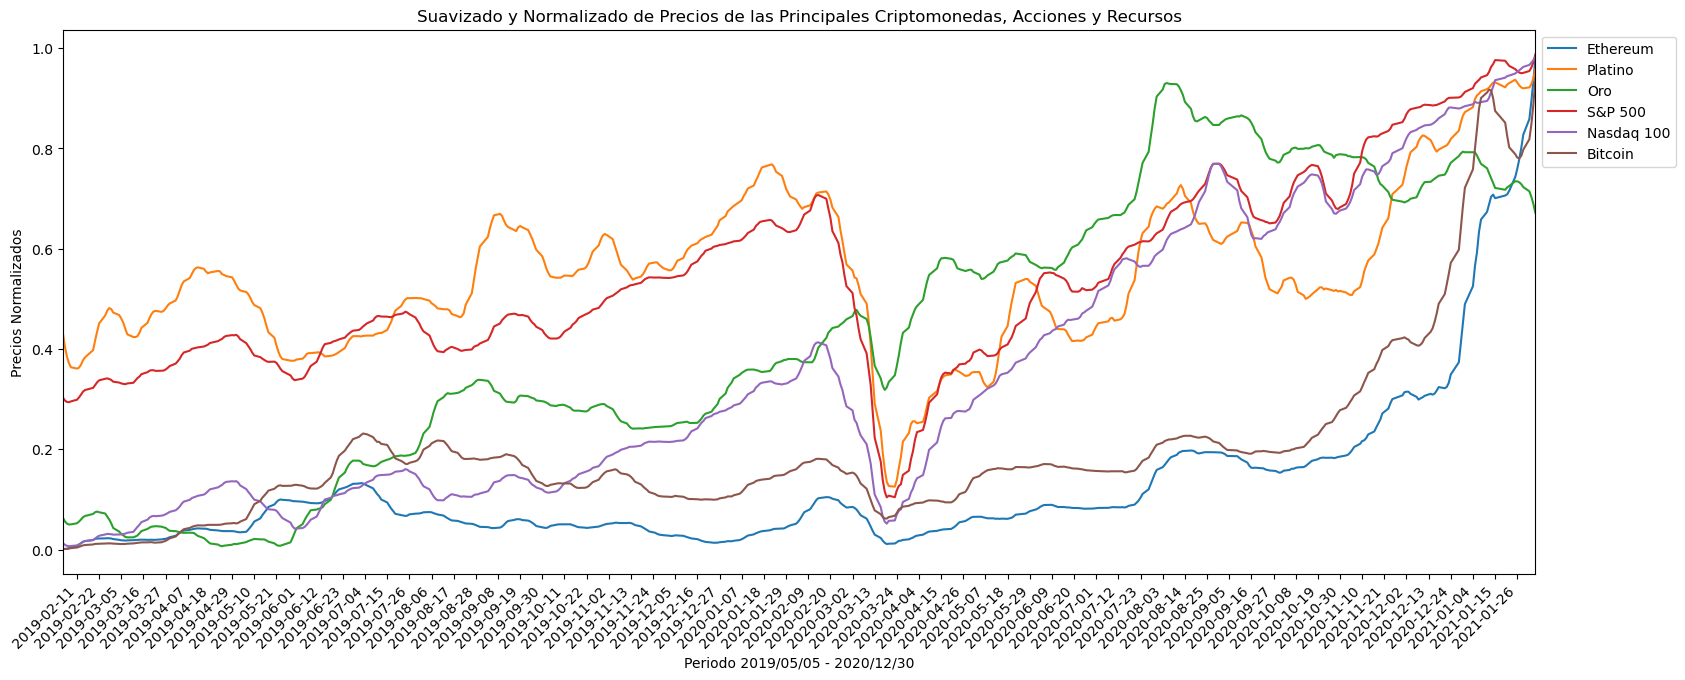

In [16]:
#Grafico 1 (NO INTERACTIVO)
ig, ax = plt.subplots(figsize=(19, 8), facecolor='white')

column_labels = {
    'Ethereum_Price': 'Ethereum',
    'Platinum_Price': 'Platino',
    'Gold_Price': 'Oro',
    'S&P_500_Price': 'S&P 500',
    'Nasdaq_100_Price': 'Nasdaq 100',
    'Bitcoin_Price': 'Bitcoin'
}

ax.set_facecolor('white')  
ax.grid(False)  

# Suaviza y grafica las columnas normalizadas
for column in price_columns:
    smooth_data = savgol_filter(df_normalized[column], window_length=18, polyorder=3)
    ax.plot(df_normalized.index, smooth_data, label=column_labels[column])

ax.set_xlim([fecha_inicio, fecha_fin]) 
ax.xaxis.set_major_locator(mdates.DayLocator(interval=11))  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)

ax.set_title('Suavizado y Normalizado de Precios de las Principales Criptomonedas, Acciones y Recursos')
ax.set_xlabel('Periodo 2019/05/05 - 2020/12/30')
ax.set_ylabel('Precios Normalizados')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1)) 


plt.show()

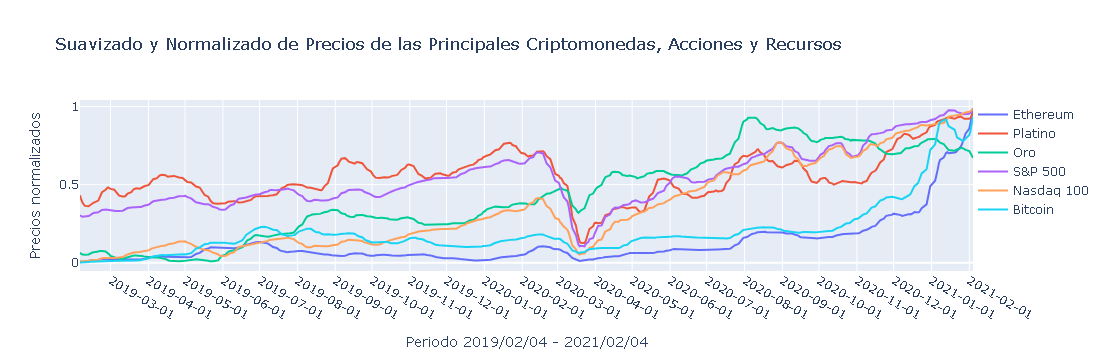

In [18]:
# GRAFICO 2 (INTERACTIVO)

fig = go.Figure()

column_labels = {
    'Ethereum_Price': 'Ethereum',
    'Platinum_Price': 'Platino',
    'Gold_Price': 'Oro',
    'S&P_500_Price': 'S&P 500',
    'Nasdaq_100_Price': 'Nasdaq 100',
    'Bitcoin_Price': 'Bitcoin'
}


for column in price_columns:
    smooth_data = savgol_filter(df_normalized[column], window_length=18, polyorder=3)
    fig.add_trace(go.Scatter(
        x=df_normalized.index,
        y=smooth_data,
        mode='lines',
        name=column_labels[column]
    ))


fig.update_layout(
    title='Suavizado y Normalizado de Precios de las Principales Criptomonedas, Acciones y Recursos',
    xaxis_title='Periodo 2019/02/04 - 2021/02/04',
    yaxis_title='Precios normalizados',
    xaxis=dict(
        range=[fecha_inicio, fecha_fin],
        tickformat='%Y-%m-%d',
        dtick="M1"
    ),
    legend=dict(
        x=1,
        y=1,
        traceorder="normal"
    )
)


fig.show()
